In [65]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,BatchNormalization,Dropout
from tensorflow import keras
import cv2

In [2]:
trainig_ds = keras.utils.image_dataset_from_directory(
    directory= r'D:\Machine Learning revision\CNN\cat-v-dog dataset\training_set',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 8005 files belonging to 2 classes.


In [3]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory= r"D:\Machine Learning revision\CNN\cat-v-dog dataset\test_set",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 2023 files belonging to 2 classes.


In [4]:
# normalize 
def normalize(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label
trainig_ds = trainig_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [66]:
# create a model
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))

# Flatten layer
model.add(Flatten())

# fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

d:\anaconda\envs\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,405,281 (28.25 MB)

 Trainable params: 7,405,057 (28.25 MB)

 Non-trainable params: 224 (896.00 B)

In [68]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
history = model.fit(trainig_ds,epochs=10,batch_size=32,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 948s 4s/step - accuracy: 0.5476 - loss: 2.2122 - val_accuracy: 0.5096 - val_loss: 1.9261
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 847s 3s/step - accuracy: 0.5551 - loss: 0.8410 - val_accuracy: 0.5877 - val_loss: 0.6882
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 906s 4s/step - accuracy: 0.6244 - loss: 0.6685 - val_accuracy: 0.6792 - val_loss: 0.6133
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1206s 5s/step - accuracy: 0.7068 - loss: 0.5675 - val_accuracy: 0.6762 - val_loss: 0.6057
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 947s 4s/step - accuracy: 0.7384 - loss: 0.5246 - val_accuracy: 0.6822 - val_loss: 0.5947
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 908s 3s/step - accuracy: 0.7866 - loss: 0.4599 - val_accuracy: 0.6960 - val_loss: 0.5833
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 526s 2s/step - accuracy: 0.8171 - loss: 0.3947 - val_accuracy: 0.7464 - val_loss: 0.5191
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.8563 - loss: 0.3121 - val_acc

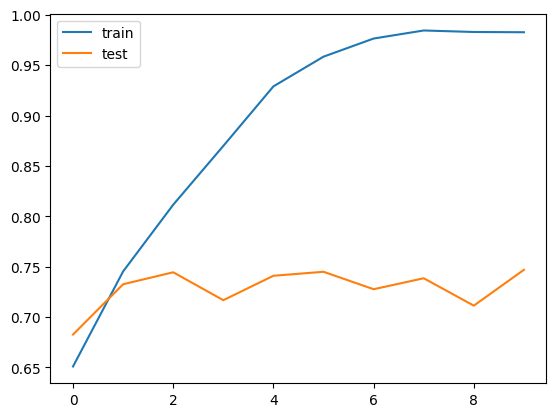

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [58]:
test_img = cv2.imread(r"D:\Machine Learning revision\CNN\cat-v-dog dataset\test_set\dogs\dog.4005.jpg")

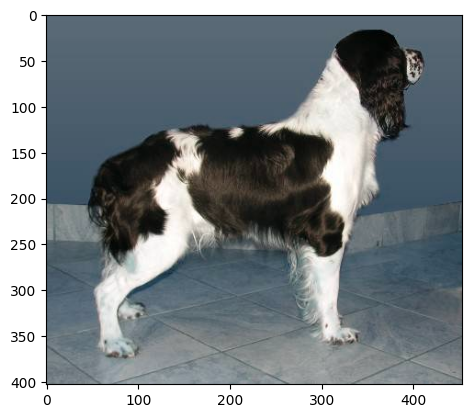

In [59]:
plt.imshow(test_img)

In [60]:
test_img.shape

(403, 454, 3)

In [61]:
test_img = cv2.resize(test_img,(256,256))

In [62]:
test_img = test_img.reshape((1,256,256,3))

In [63]:
prd = model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [64]:
prd[0][0]

np.float32(1.0)